# Tahmin Algoritmalarınının Karşılaştırılması

### Gerekli Kütüphaneler

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
# verinin yüklenmesi
df = pd.read_csv("maaslar_yeni.csv")

In [3]:
# verinin ilk 5 satırı  
df.head()

,Calisan ID,unvan,UnvanSeviyesi,Kidem,Puan,maas
0,1,Cayci,1,5,70,2250
1,2,Sekreter,2,5,70,2500
2,3,Uzman Yardimcisi,3,5,70,3000
3,4,Uzman,4,5,70,4000
4,5,Proje Yoneticisi,5,5,70,5500


In [4]:
# verinin satır ve sutun sayısı
df.shape

(30, 6)

Veri seti 30 satırdan ve 6 sutundan oluşuyor

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Calisan ID     30 non-null     int64 
 1   unvan          30 non-null     object
 2   UnvanSeviyesi  30 non-null     int64 
 3   Kidem          30 non-null     int64 
 4   Puan           30 non-null     int64 
 5   maas           30 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.5+ KB


Veri seti 5 adet sayısal (int64) ve 1 adet kategorik (object) tipinde değişkenden oluşuyor.

## Veri Ön İşleme

Veri setinde eksik değer, tekrar eden değer, aykırı değer vb. gibi problemler mevcut değildir

## Dağılımlar

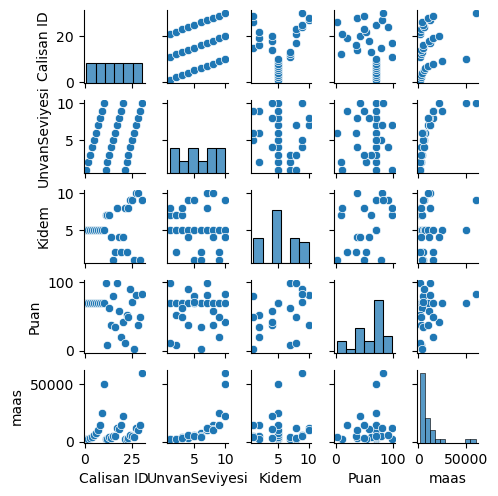

In [6]:
sns.pairplot(df,height=1)

## Özellik Seçimi

Makine öğrenmesine ID kolonu dahil edilmez çünkü aşırı öğrenmeye (overfitting) sebep olabilir

In [7]:
# degisken secim islemi
x = df.iloc[:,2:5]
y = df.iloc[:,5:]
X = x.values
Y = y.values

Bağımlı değişken yani tahmin etmeye çalıştığımız değişken y'dir. 

In [8]:
y.head(3) # bağımlı değişkenlerimizin ilk 3 satırı

,maas
0,2250
1,2500
2,3000


Bağımsız değişkenlerden bağımlı değişken olan maaşı tahmin etmek istiyoruz.

In [9]:
x.head(3) # bağımsız değişkenlerimizin ilk 3 satırı

,UnvanSeviyesi,Kidem,Puan
0,1,5,70
1,2,5,70
2,3,5,70


In [10]:
# Korelasyon
df.corr()

,Calisan ID,UnvanSeviyesi,Kidem,Puan,maas
Calisan ID,1.000000,0.331847,0.206278,-0.251278,0.226287
UnvanSeviyesi,0.331847,1.000000,-0.125200,0.034948,0.727036
Kidem,0.206278,-0.125200,1.000000,0.322796,0.117964
Puan,-0.251278,0.034948,0.322796,1.000000,0.201474
maas,0.226287,0.727036,0.117964,0.201474,1.000000


Maaş ile unvan seviyesi arasında pozitif yönde yüksek bir ilişki var.

## Doğrusal Regresyon (Linear Regression)

In [11]:
lin_reg = LinearRegression()
lin_reg.fit(X,Y)

model = sm.OLS(lin_reg.predict(X),X)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.903
Model:                            OLS   Adj. R-squared (uncentered):              0.892
Method:                 Least Squares   F-statistic:                              83.89
Date:                Thu, 09 Feb 2023   Prob (F-statistic):                    8.38e-14
Time:                        18:46:31   Log-Likelihood:                         -295.74
No. Observations:                  30   AIC:                                      597.5
Df Residuals:                      27   BIC:                                      601.7
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### <b>$R^2$ değerimiz 0.903 geldi p-value değeri yüksek olan x2 ve x3 değişkenlerini atalım ve modelimizi yeniden eğitelim</b>

In [12]:
# degisken secim islemi
x = df.iloc[:,2:3]
y = df.iloc[:,5:]
X = x.values
Y = y.values

In [13]:
lin_reg = LinearRegression()
lin_reg.fit(X,Y)

model = sm.OLS(lin_reg.predict(X),X)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.942
Model:                            OLS   Adj. R-squared (uncentered):              0.940
Method:                 Least Squares   F-statistic:                              468.1
Date:                Thu, 09 Feb 2023   Prob (F-statistic):                    1.93e-19
Time:                        18:46:31   Log-Likelihood:                         -287.43
No. Observations:                  30   AIC:                                      576.9
Df Residuals:                      29   BIC:                                      578.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### <b>Tek değişken üzerinde eğittiğimiz modelimizin $R^2$ değeri 0.942 geldi. Modelimizin başarı değeri artmış oldu.

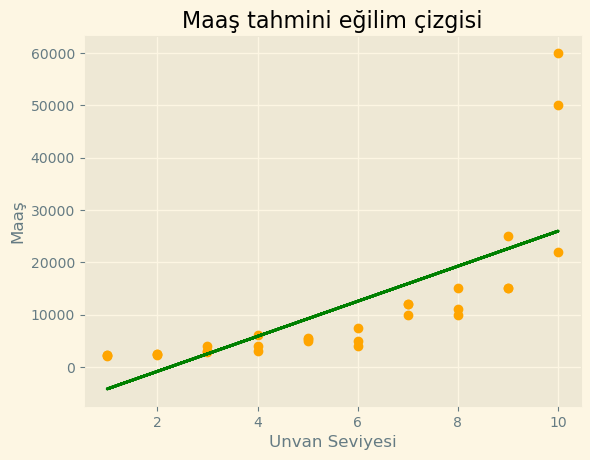

In [14]:
plt.style.use("Solarize_Light2")
plt.scatter(X,y, color='orange')
plt.xlabel('Unvan Seviyesi')
plt.ylabel('Maaş')
plt.title('Maaş tahmini eğilim çizgisi')
plt.plot(x, lin_reg.predict(X), color = 'green')
plt.show()

## Polinomal Regresyon (Polynomial Regression)

### 3 parametreli model 

In [15]:
# degisken secim islem
x = df.iloc[:,2:5]
y = df.iloc[:,5:]
X = x.values
Y = y.values

In [16]:
poly_reg = PolynomialFeatures(degree = 4)
x_poly = poly_reg.fit_transform(X)
lin_reg2 = LinearRegression()
lin_reg2.fit(x_poly,y)

model2 = sm.OLS(lin_reg2.predict(poly_reg.fit_transform(X)),X)
print(model2.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.680
Model:                            OLS   Adj. R-squared (uncentered):              0.644
Method:                 Least Squares   F-statistic:                              19.11
Date:                Thu, 09 Feb 2023   Prob (F-statistic):                    7.49e-07
Time:                        18:46:31   Log-Likelihood:                         -317.93
No. Observations:                  30   AIC:                                      641.9
Df Residuals:                      27   BIC:                                      646.1
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### Tek parametreli model

In [17]:
# degisken secim islemi
x = df.iloc[:,2:3]
y = df.iloc[:,5:]
X = x.values
Y = y.values

In [18]:
poly_reg = PolynomialFeatures(degree = 4)
x_poly = poly_reg.fit_transform(X)
lin_reg2 = LinearRegression()
lin_reg2.fit(x_poly,y)

model2 = sm.OLS(lin_reg2.predict(poly_reg.fit_transform(X)),X)
print(model2.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.759
Model:                            OLS   Adj. R-squared (uncentered):              0.751
Method:                 Least Squares   F-statistic:                              91.39
Date:                Thu, 09 Feb 2023   Prob (F-statistic):                    1.82e-10
Time:                        18:46:31   Log-Likelihood:                         -311.94
No. Observations:                  30   AIC:                                      625.9
Df Residuals:                      29   BIC:                                      627.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

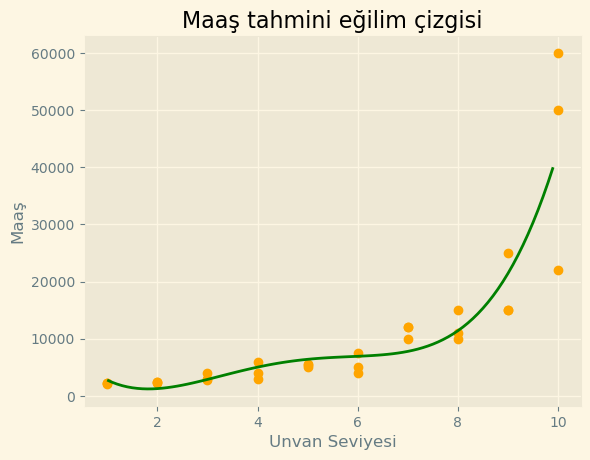

In [19]:
plt.scatter(X, y, color='orange')
plt.xlabel('Unvan Seviyesi')
plt.ylabel('Maaş')
plt.title('Maaş tahmini eğilim çizgisi')
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.plot(X_grid, lin_reg2.predict(poly_reg.fit_transform(X_grid)), color='green')
plt.show()

## Verilerin Ölçeklendirilmesi

Makine öğrenemesi modelimizin performansını ve istatistiksel anlamlılığını artırmak için verilerimizi standart normal dağılıma çevirerek ölçeklendirme işlemini gerçekleştirmiş olacağız.


In [4]:
sc1=StandardScaler()
x_olcekli = sc1.fit_transform(X) # x degiskenini olceklendirdik
sc2=StandardScaler()
y_olcekli = np.ravel(sc2.fit_transform(Y.reshape(-1,1))) # y degiskenini olceklendirdik

## Destek Vektör Regresyonu (Support Vector Regression)

### 3 parametreli model 

In [3]:
# degisken secim islem
x = df.iloc[:,2:5]
y = df.iloc[:,5:]
X = x.values
Y = y.values

In [5]:
svr_reg = SVR(kernel='rbf')
svr_reg.fit(x_olcekli,y_olcekli)

model3 = sm.OLS(svr_reg.predict(x_olcekli),x_olcekli)
print(model3.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.782
Model:                            OLS   Adj. R-squared (uncentered):              0.758
Method:                 Least Squares   F-statistic:                              32.37
Date:                Thu, 09 Feb 2023   Prob (F-statistic):                    4.34e-09
Time:                        18:49:53   Log-Likelihood:                        -0.92453
No. Observations:                  30   AIC:                                      7.849
Df Residuals:                      27   BIC:                                      12.05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### Tek parametreli model

In [3]:
# degisken secim islem
x = df.iloc[:,2:3]
y = df.iloc[:,5:]
X = x.values
Y = y.values

In [5]:
svr_reg = SVR(kernel='rbf')
svr_reg.fit(x_olcekli,y_olcekli)

model3 = sm.OLS(svr_reg.predict(x_olcekli),x_olcekli)
print(model3.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.770
Model:                            OLS   Adj. R-squared (uncentered):              0.762
Method:                 Least Squares   F-statistic:                              97.19
Date:                Thu, 09 Feb 2023   Prob (F-statistic):                    9.11e-11
Time:                        18:59:58   Log-Likelihood:                         -1.3680
No. Observations:                  30   AIC:                                      4.736
Df Residuals:                      29   BIC:                                      6.137
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

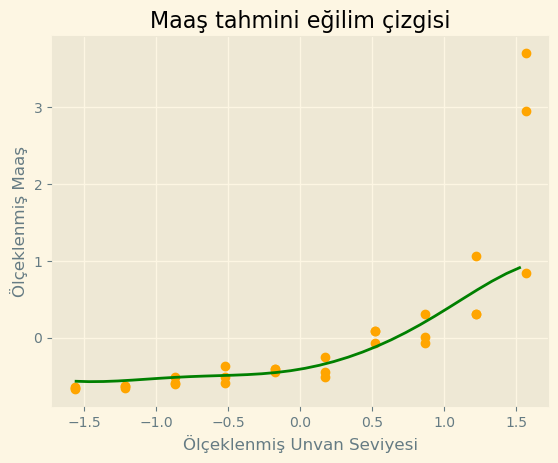

In [26]:
plt.style.use("Solarize_Light2")
plt.scatter(x_olcekli, y_olcekli, color='orange')
plt.xlabel('Ölçeklenmiş Unvan Seviyesi')
plt.ylabel('Ölçeklenmiş Maaş')
plt.title('Maaş tahmini eğilim çizgisi')
X_grid = np.arange(min(x_olcekli), max(x_olcekli), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.plot(X_grid, svr_reg.predict(X_grid), color='green')
plt.show()

## Karar Ağacı (Decision Tree Regression)

### 3 parametreli model 

In [8]:
# degisken secim islem
x = df.iloc[:,2:5]
y = df.iloc[:,5:]
X = x.values
Y = y.values

In [9]:
r_dt = DecisionTreeRegressor(random_state=0)
r_dt.fit(X,Y)

model4=sm.OLS(r_dt.predict(X),X)
print(model4.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.679
Model:                            OLS   Adj. R-squared (uncentered):              0.644
Method:                 Least Squares   F-statistic:                              19.08
Date:                Thu, 09 Feb 2023   Prob (F-statistic):                    7.62e-07
Time:                        19:01:11   Log-Likelihood:                         -317.95
No. Observations:                  30   AIC:                                      641.9
Df Residuals:                      27   BIC:                                      646.1
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### Tek parametreli model 

In [10]:
# degisken secim islem
x = df.iloc[:,2:3]
y = df.iloc[:,5:]
X = x.values
Y = y.values

In [11]:
r_dt = DecisionTreeRegressor(random_state=0)
r_dt.fit(X,Y)

model4=sm.OLS(r_dt.predict(X),X)
print(model4.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.751
Model:                            OLS   Adj. R-squared (uncentered):              0.742
Method:                 Least Squares   F-statistic:                              87.29
Date:                Thu, 09 Feb 2023   Prob (F-statistic):                    3.01e-10
Time:                        19:01:16   Log-Likelihood:                         -312.62
No. Observations:                  30   AIC:                                      627.2
Df Residuals:                      29   BIC:                                      628.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

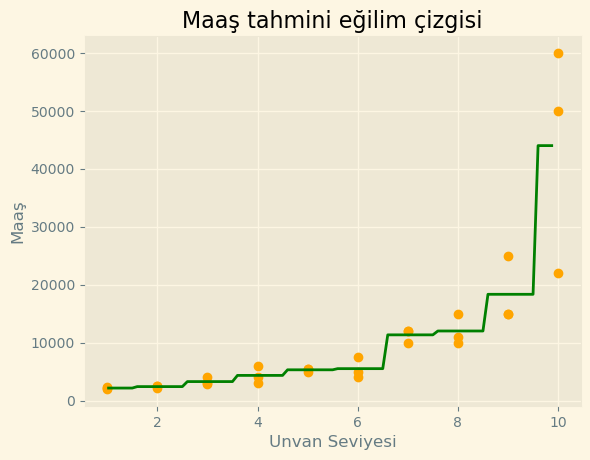

In [25]:
plt.style.use("Solarize_Light2")
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, Y, color='orange')
plt.xlabel('Unvan Seviyesi')
plt.ylabel('Maaş')
plt.title('Maaş tahmini eğilim çizgisi')
plt.plot(X_grid, r_dt.predict(X_grid), color='green')
plt.show()

## Rastgele Orman (Random Forest Regression)

### 3 parametreli model 

In [14]:
# degisken secim islem
x = df.iloc[:,2:5]
y = df.iloc[:,5:]
X = x.values
Y = y.values

In [15]:
rf_reg=RandomForestRegressor(n_estimators = 10,random_state=0)
rf_reg.fit(X,Y.ravel())

model5=sm.OLS(rf_reg.predict(X),X)
print(model5.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.713
Model:                            OLS   Adj. R-squared (uncentered):              0.681
Method:                 Least Squares   F-statistic:                              22.31
Date:                Thu, 09 Feb 2023   Prob (F-statistic):                    1.79e-07
Time:                        19:06:36   Log-Likelihood:                         -316.07
No. Observations:                  30   AIC:                                      638.1
Df Residuals:                      27   BIC:                                      642.3
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### Tek parametreli model 

In [16]:
# degisken secim islem
x = df.iloc[:,2:3]
y = df.iloc[:,5:]
X = x.values
Y = y.values

In [17]:
rf_reg=RandomForestRegressor(n_estimators = 10,random_state=0)
rf_reg.fit(X,Y.ravel())

model5=sm.OLS(rf_reg.predict(X),X)
print(model5.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.719
Model:                            OLS   Adj. R-squared (uncentered):              0.709
Method:                 Least Squares   F-statistic:                              74.13
Date:                Thu, 09 Feb 2023   Prob (F-statistic):                    1.75e-09
Time:                        19:09:24   Log-Likelihood:                         -315.35
No. Observations:                  30   AIC:                                      632.7
Df Residuals:                      29   BIC:                                      634.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

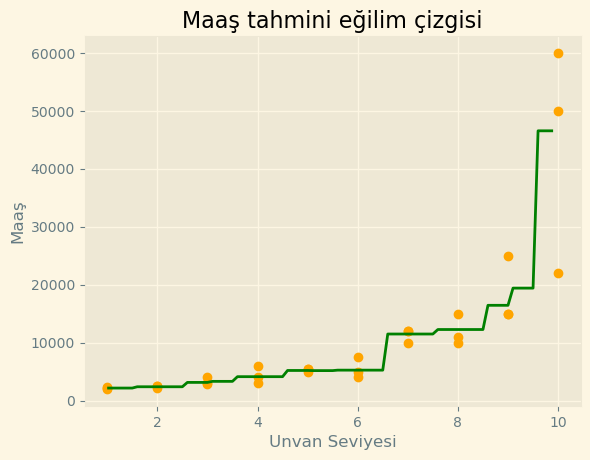

In [24]:
plt.style.use("Solarize_Light2")
plt.scatter(X, y, color='orange')
plt.xlabel('Unvan Seviyesi')
plt.ylabel('Maaş')
plt.title('Maaş tahmini eğilim çizgisi')
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.plot(X_grid, rf_reg.predict(X_grid), color='green')
plt.show()

## KARŞILAŞTIRMA

In [22]:
from IPython.display import display, HTML

table = [["Doğrusal Regresyon", "0.942", "0.903"],
         ["Polinomal Regresyon", "0.759", "0.680"],
         ["Destek Vektör Regresyonu", "0.770", "0.782"],
         ["Karar Ağacı", "0.751", "0.679"],
         ["Rastgele Orman", "0.719", "0.713"]]

display(HTML(
    '<table><tr><th>Model</th><th>$R^2$ (Tek Parametreli)</th><th>$R^2$ (Üç Parametreli)</th></tr>{}</table>'.format(
        ''.join('<tr><td>{}</td><td>{}</td><td>{}</td></tr>'.format(*row) for row in table)
    )
))


Model,$R^2$ (Tek Parametreli),$R^2$ (Üç Parametreli)
Doğrusal Regresyon,0.942,0.903
Polinomal Regresyon,0.759,0.680
Destek Vektör Regresyonu,0.770,0.782
Karar Ağacı,0.751,0.679
Rastgele Orman,0.719,0.713


En yüksek $R^2$ değerine sahip algoritma doğrusal regresyon olduğu için bu veriye en uygun algoritmanın doğrusal regresyon olduğunu söyleyebiliriz.